"A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It's a tree-like structure where each internal node represents a "decision" based on the value of a feature, each branch represents the outcome of that decision, and each leaf node represents the final decision or outcome. Decision trees are built recursively by splitting the dataset into subsets based on the values of features, with the goal of maximizing the homogeneity of the target variable within each subset. This process continues until a stopping criterion is met, such as reaching a maximum tree depth or when further splits do not improve the model's performance. Decision trees are intuitive, easy to interpret, and can handle both numerical and categorical data. They are widely used in various domains, including finance, healthcare, and marketing, for tasks such as customer segmentation, fraud detection, and medical diagnosis."







### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline 
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
%pip install seaborn

In [3]:
import seaborn as sns

### Loading the Dataset: It loads the Iris dataset from Scikit-learn's datasets module and converts it into a Pandas DataFrame for easier manipulation.

In [4]:
# load the iris datasets
iris = datasets.load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Data Preprocessing: It checks the target variable and converts it into a numeric format because machine learning models can't directly work with categorical data.


In [5]:
# target here is category of flower is it sitosa verticaler virginica
# machine learning can no work with categorical data so that i convert it to numeric

In [6]:
df["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

#### Visualizing the Data: It uses Seaborn to create a scatter plot based on petal length and petal width, with different colors representing different flower species.


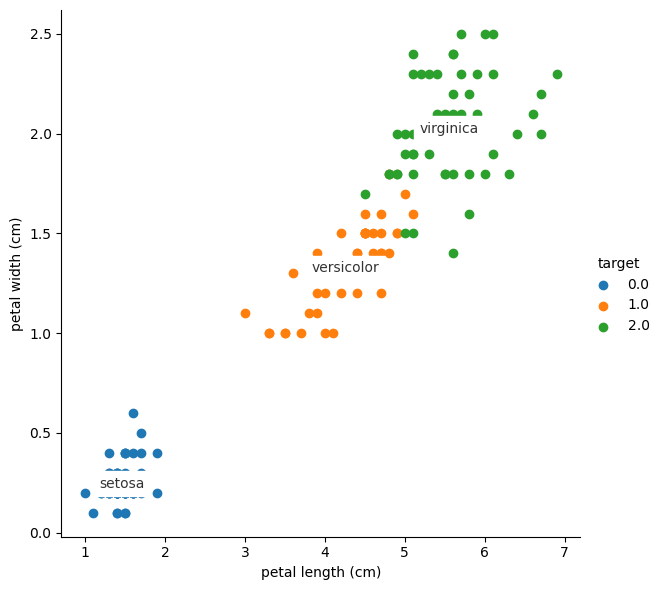

In [17]:
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()
for i in range(len(iris.target_names)):
    plt.text(df[df['target'] == i]['petal length (cm)'].mean(),
             df[df['target'] == i]['petal width (cm)'].mean(),
             iris.target_names[i],
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=10,
             backgroundcolor='white',
             color='black',
             alpha=0.8)


#### Building the Decision Tree Model: It builds a decision tree model using the DecisionTreeClassifier from Scikit-learn. In this case, it uses entropy as the criterion for splitting nodes and limits the depth of the tree to 3.


In [20]:
# fit a CART model to the data
#model = DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

model.fit(iris.data, iris.target)
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


#### Model Evaluation: It evaluates the performance of the model using metrics like accuracy, classification report, and confusion matrix.


In [21]:
model.score(iris.data,iris.target)

0.9733333333333334

Make Predicition

In [10]:
expected = iris.target
predicted = model.predict(iris.data)

summerize the fit of the model

In [11]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


#### Interactive Decision Tree Visualization: It defines a function Decision_Tree that allows users to interactively visualize decision boundaries based on different criteria (Gini or Entropy) and depths.


In [12]:
def Decision_Tree(Type,Depth):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        model =DecisionTreeClassifier(criterion=Type,max_depth=Depth)  
                
        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
        model.fit(iris.data, iris.target)
        expected = iris.target
        predicted = model.predict(iris.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))


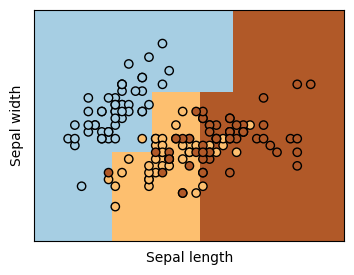

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [27]:
# Call the Decision_Tree function with desired Type and Depth
Decision_Tree(Type="entropy", Depth=3)


#### Installing Additional Libraries: It installs the necessary library 'ipywidgets' to enable the interactive visualization.

In [13]:
%pip install ipywidgets


In [14]:
from ipywidgets import interact
from IPython.display import display


In [15]:
i = interact(Decision_Tree, Type=['gini','entropy'],Depth=(1,10))


interactive(children=(Dropdown(description='Type', options=('gini', 'entropy'), value='gini'), IntSlider(value…

#### In the classification report, we can see precision, recall, and F1-score for each class (0, 1, and 2).
##### The overall accuracy of the model is 97%, which means that it correctly classified 97% of the instances in the dataset.
##### The confusion matrix shows that there were no misclassifications for class 0, while there were a few misclassifications for classes 1 and 2.
##### Overall, the model performs well with high precision, recall, and F1-score for each class, indicating its effectiveness in classifying the iris dataset.